In [1]:
import datetime
import time
from datetime import datetime, date, timedelta
import pandas as pd
import numpy as np
from pathlib import Path
from pandas.testing import assert_frame_equal
import matplotlib.pyplot as plt
from matplotlib.cm import Greys
import matplotlib.dates as mdt
import seaborn as sns
import scipy.stats as ss
p1 = Path.cwd() / 'back_data'

In [2]:
# matplotlib에게 notebook에서 그림을 그리도록 지시
%matplotlib inline
# Jupyter Notebook 상에서 한글이 깨지지 않고 나오도록 조치
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
# config 설정으로 고화질 도표 생성
%config InlineBackend.figure_format = 'svg'

In [3]:
# pandas는 plot 속성(혹은 plot() 메서드)을 호출하여 도식화 가능 -> 내부적으로 matplotlib 함수 호출해 도면
# seaborn은 정돈된 데이터와 작업, matplotlib은 집계된 데이터에 작동
# seaborn은 도식화 함수에서 pandas DataFrame 객체를 허용

In [4]:
# matplotlib은 객체의 계층 구조를 사용해 출력 -> Figure > Axes(axis와는 별개) / axis는 x, y 축 나타내기

[(0.0, 10.0),
 (-3.0, 8.0),
 Text(0.5, 0, 'X axis'),
 Text(0, 0.5, 'Y axis'),
 Text(0.5, 1.0, 'Line Plot')]

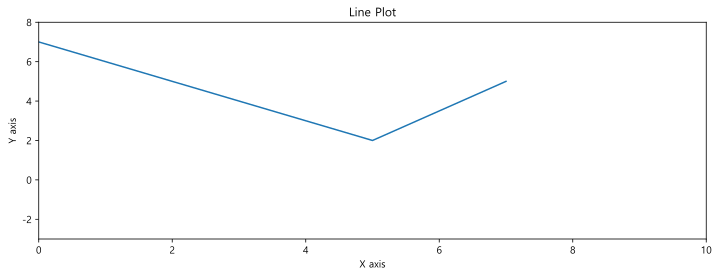

In [5]:
# subplots() 함수 사용하여 상태 저장 및 객체지향 혼용
x = [-3, 5, 7]
y = [10, 2, 5]
fig, ax = plt.subplots(figsize=(12, 4))
# ax라는 Axes 객체에 x, y에 대한 선 그래프 그리기
ax.plot(x, y)
# set() 메서드 활용하여 각종 설정 가능
ax.set(xlim=(0, 10), ylim=(-3, 8), xlabel='X axis', ylabel='Y axis', title='Line Plot')

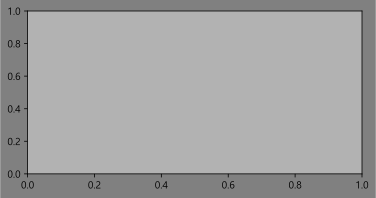

In [6]:
fig, ax = plt.subplots(1, 1)
# fig의 get_size_inches()로 확인, set_size_inches() 메서드로 변경 -> 괄호 안에 숫자를 직접 전달
fig.set_size_inches(6, 3), fig.axes
# set_facecolor() 활용해 색상 변경(따옴표는 꼭 들어가야) -> fig, ax 공통
fig.set_facecolor('0.5')
ax.set_facecolor('0.7')

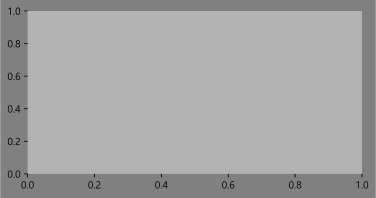

In [7]:
# spines 속성을 활용해 spine에 접근 가능
spines = ax.spines
# spines['left'] 형식으로 접근하여 변경 가능
for direction in ['right', 'left', 'top', 'bottom']:
    # set_linewidth(), set_visible() 메서드 등 활용
    spines[direction].set_visible(False)
fig

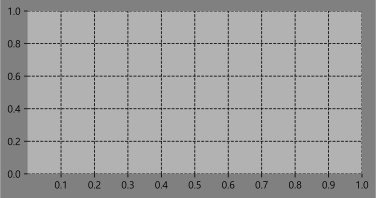

In [8]:
# set_xticks() 메서드, set_xticklabels() 메서드 등을 활용해 x축 내용 변경
# tick_params() 메서드를 활용할 수도
ax.set_xticks(np.arange(0.1, 1.1, 0.1))
# grid() 메서드 활용 가능(set, get 형식이 아닌 점 중요) -> visible(과거 b), lindwidth, linestyle, color 파라미터 이용하여 설정
# 혹은 grid() 메서드에 axis='x', axis='y' 인자 전달 가능
ax.grid(color='black', linestyle='--')
fig

In [9]:
alta = pd.read_csv(p1 / 'alta-noaa-1980-2019.csv')
alta.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
0,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-01,NaN,NaN,NaN,NaN,...,29.0,38.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-02,NaN,NaN,NaN,NaN,...,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-03,NaN,NaN,NaN,NaN,...,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-04,NaN,NaN,NaN,NaN,...,30.0,31.0,18.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-05,NaN,NaN,NaN,NaN,...,30.0,34.0,26.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# 2018-2019 데이터 확인
data = (alta
.assign(DATE=pd.to_datetime(alta['DATE']))
.set_index('DATE')
.loc['2018-09':'2019-08']
['SNWD']
# 누락된 데이터가 있는 경우 시계열에 따라 내삽(interpolate) 가능 -> interpolate() 메서드 이용, limit_direction='both' 인자 전달
.interpolate(limit_direction='both')
)
data.tail()

DATE
2019-08-27    0.0
2019-08-28    0.0
2019-08-29    0.0
2019-08-30    0.0
2019-08-31    0.0
Name: SNWD, dtype: float64

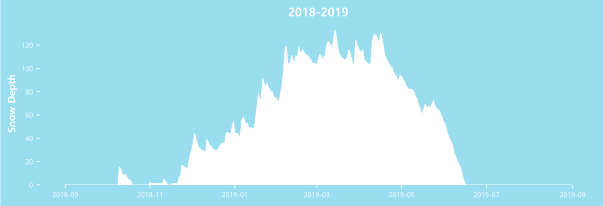

In [11]:
# 색상 설정
blue = '#99ddee'
white = '#ffffff'
# pyplot의 subplots() 함수 이용하여 fig, ax 객체 생성 -> facecolor 파라미터 통해 fig 색상 변경
fig, ax = plt.subplots(figsize=(10, 3), facecolor=blue)
# ax의 색도 blue로 변경
ax.set_facecolor(blue)
# spines 속성 활용하여 모든 spine들의 색상을 보이지 않도록 변경
spines = ax.spines
for direction in ['right', 'left', 'top', 'bottom']:
    spines[direction].set_visible(False)
# tick_params() 메서드 활용 -> axis='both' 인자 전달하여 x, y축 모두 적용, labelsize 파라미터도 활용 가능
ax.tick_params(axis='both', colors=white, labelsize=7)
# set_ylabel() 메서드 활용하여 y축의 라벨 작성 -> fontweight 파라미터 활용 가능
ax.set_ylabel('Snow Depth', color=white, fontweight='bold')
# set_title() 메서드 활용하여 axes의 제목 지정
ax.set_title('2018-2019', color=white, fontweight='bold')
# stackplot() 메서드를 이용하여 채우는 선 그래프 삽입 -> x축과 y축에 들어갈 인자를 키워드 없이 전달
ax.stackplot(data.index, data, color=white)

In [12]:
(alta
.assign(DATE=pd.to_datetime(alta['DATE']))
.set_index('DATE')
['SNWD']
# Series를 DataFrame으로 변환
.to_frame()
# 'diff' 열을 새로 만들어 바로 다음 날과의 차이를 파악
.assign(diff=lambda df: df['SNWD'].shift(-1).sub(df['SNWD']))
# pipe() 메서드와 불리언 배열 활용하여 다음 날과의 차이의 절대값이 50 이상인 데이터만 추출
.pipe(lambda df: df[df['diff'].abs().gt(50)])
.head()
)

,SNWD,diff
DATE,,
1989-11-27,60.0,-60.0
2007-02-28,87.0,-78.0
2008-05-22,62.0,-62.0
2008-05-23,0.0,66.0
2009-01-16,76.0,-76.0


In [13]:
# 차이의 절대값이 50 이상인 열이 너무 많음 -> 데이터에 문제가 있는듯?
# 해당 지점을 np.nan으로 대체하는 함수 생성
def fix_gaps(ser, threshold=50):
    mask = (ser
    .to_frame()
    .assign(diff=lambda df: df['SNWD'].shift(-1).sub(df['SNWD']))
    # 필터링을 거는게 아니라 그냥 True/False 형식으로 남겨둠 -> 그래야 where() 메서드에서 이용 가능
    .pipe(lambda df: df['diff'].abs().gt(threshold))
    )
    # where() 메서드 이용하여 mask에 해당하지 않으면 원래 값, 해당하면 np.nan 반환
    return ser.where(~mask, np.nan)

<AxesSubplot:xlabel='DATE'>

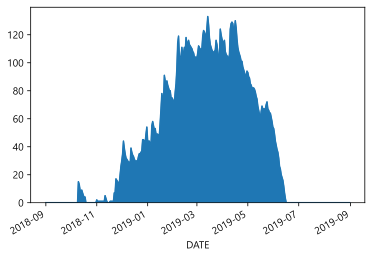

In [14]:
(alta
.assign(DATE=pd.to_datetime(alta['DATE']))
.set_index('DATE')
.loc['2018-09':'2019-08']
['SNWD']
# fix_gaps 함수를 넣어 문제가 있어 보이는 데이터를 np.nan으로 변환
.pipe(fix_gaps)
# 누락된 데이터가 있는 경우 시계열에 따라 내삽(interpolate) 가능 -> interpolate() 메서드 이용, limit_direction='both' 인자 전달
.interpolate(limit_direction='both')
# plot 속성의 area() 메서드를 전달하여 가능
.plot.area()
)


In [15]:
# pandas는 matplotlib에 있는 도면 중 일부만 가능 -> 선, 막대, 상자, 산포도, 커널밀도추정(KDE), 히스토그램 등
# x/y축의 소스를 알아야 -> 기본설정 파악 필요
# 선 도면은 인덱스를 x축에, 각 열을 y축에
# 산포도의 경우 x, y축에 사용할 열을 지정해줘야
# 히스토그램, 상자, KDE의 경우 인덱스를 무시하고 각 열의 분포를 그림으로 표시

In [16]:
# 데이터셋의 일변량 도표 확인
flights = pd.read_csv(p1 / 'flights.csv')

In [17]:
cols = ['DIVERTED', 'CANCELLED', 'DELAYED']
(flights
# 'ARR_DELAY' 열이 15 이상이 되면 연착으로 지정하여 새로운 열 생성
.assign(DELAYED=flights['ARR_DELAY'].ge(15).astype('int'))
# 'DIVERTED', 'CANCELLED', 'DELAYED' 중 하나라도 해당되면 1 -> ON_TIME의 경우 1에서 하나라도 해당되는 경우(1) 빼기 진행
.assign(ON_TIME=lambda df: 1 - df[cols].any(axis=1))
[cols + ['ON_TIME']]
.sum()
)

DIVERTED       137
CANCELLED      881
DELAYED      11685
ON_TIME      45789
dtype: int64

<AxesSubplot:title={'center':'Arrival Delay'}, ylabel='Frequency'>

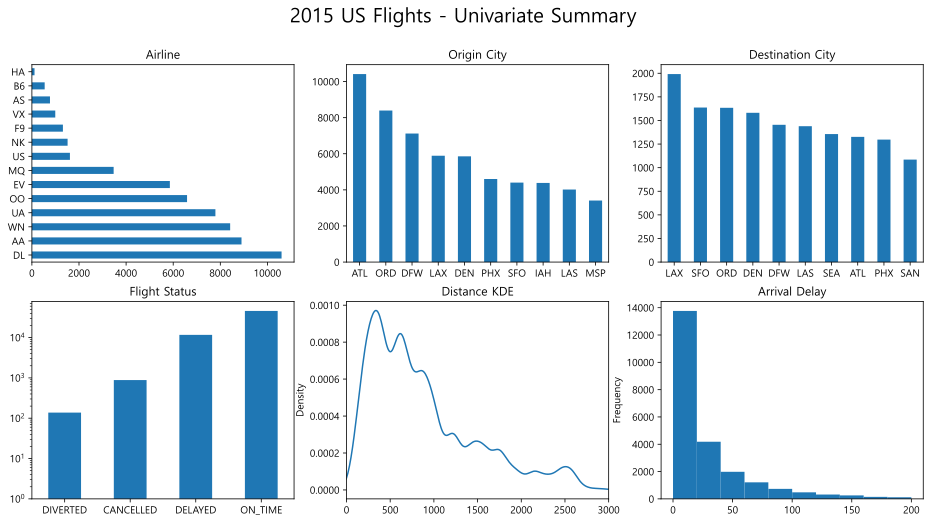

In [18]:
# pyplot subplots() 함수 통해 fig, axs 생성
fig, ax_array = plt.subplots(2, 3, figsize=(16, 8))
# numpy의 array 개념과 유사하게 각 ax들 지정
(ax1, ax2, ax3), (ax4, ax5, ax6) = ax_array
# fig의 suptitle() 메서드의 경우 fontsize 파라미터 활용
fig.suptitle('2015 US Flights - Univariate Summary', fontsize=20)
# 'AIRLINE' 열의 개수를 막대 그래프로 생성
(flights['AIRLINE']
.value_counts()
.plot.barh(ax=ax1, title='Airline')
)
# 'ORG_AIR' 열의 개수를 막대 그래프로 생성
(flights['ORG_AIR']
.value_counts()
# plot 속성 이용 시 rot 파라미터를 통해 xticklabel의 각도 조정 자능
.plot.bar(ax=ax2, rot=0, title='Origin City')
)
# 'DEST_AIR' 열의 개수를 막대 그래프로 생성하되, 상위 10개로 제한
(flights['DEST_AIR']
.value_counts()
.head(10)
.plot.bar(ax=ax3, rot=0, title='Destination City')
)
# 'DELAYED'와 'ON_TIME' 정의 후 선 그래프로 생성
(flights
.assign(DELAYED=flights['ARR_DELAY'].ge(15).astype(int))
.assign(ON_TIME=lambda df_:1 - df_[cols].any(axis=1))
[['DIVERTED', 'CANCELLED', 'DELAYED', 'ON_TIME']]
.sum()
# log=True 인자 전달하여 yticks의 단위를 10의 n승으로 표현
.plot.bar(ax=ax4, rot=0, log=True, title='Flight Status')
)
# flights의 거리를 커널밀도추정 그래프로 생성
(flights['DIST']
.plot.kde(ax=ax5, xlim=(0, 3000), title='Distance KDE')
)
# 'ARR_DELAY' 열을 히스토그램으로 생성
(flights['ARR_DELAY']
# range 파라미터 활용하여 범위 제한, 추가로 bins 파라미터도 이용 가능
.plot.hist(ax=ax6, title='Arrival Delay', range=(0, 200))
)

<AxesSubplot:>

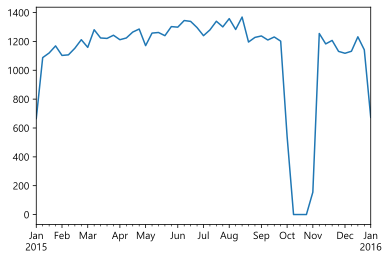

In [19]:
# 주별 항공편 수 도식화를 위해 pandas Timestamp로 변환할 필요
df_date = (flights[['MONTH', 'DAY']]
# YEAR, HOUR, MINUTE 열 생성
.assign(YEAR=2015, HOUR=flights['SCHED_DEP'] // 100, MINUTE=flights['SCHED_DEP'] % 100)
)
flight_dep = pd.to_datetime(df_date)
# 해당 pandas Timestamp를 flights의 인덱스로 지정
flights.index = flight_dep
# resample() 혹은 groupby() 메서드 활용하여 주별로 정리
(flights
.groupby(pd.Grouper(freq='W'))
.size()
.plot()
)

In [20]:
# 첫 주와 마지막 주는 7일이 꽉찬 주가 아닐 수도 있으므로 제외, 중간 결측으로 보이는 데이터는 interpolate로 채우기
# interpolate로 채우기 위한 함수 생성
def interp(ser, n=600):
    # n보다 크면 그대로 유지, 아니면 np.nan으로 변환, 그 후 interpolate() 메서드 활용
    return ser.where(ser > n, np.nan).interpolate(limit_direction='both')

Text(0.8, 0.77, 'missing data')

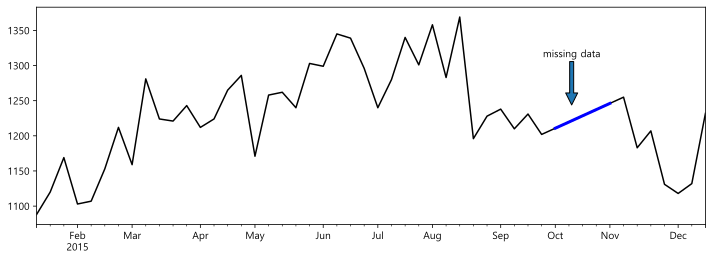

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
data = (flights
.groupby(pd.Grouper(freq='W'))
.size()
.iloc[1:-2]
)
# 보간법으로 채워진 데이터를 파악하기 위해 600 미만인 data를 mask로 지정
mask = data < 600
(data
.pipe(interp)
.plot(color='black', ax=ax)
)
(data
# 먼저 pipe(interp)로 데이터를 전체 바꾼 후
.pipe(interp)
# loc 속성을 통해 보간법으로 채워진 데이터만 지정
.loc[mask]
.plot(color='blue', linewidth=3, ax=ax)
)
# annotate() 메서드 이용하여 주석 삽입
# xy(위치), xytext(텍스트의 위치), text, ha, arrowprops 파라미터 등 활용
# xy 및 xytext 파라미터에 좌표 갑을 넣을 떄는 xycoords='axes fraction' 꼭 전달해야
ax.annotate(xy=(0.8, 0.55), xytext=(0.8, 0.77), xycoords='axes fraction', text='missing data', ha='center', arrowprops=dict())

<AxesSubplot:title={'center':'Average Distance'}, xlabel='DEST_AIR'>

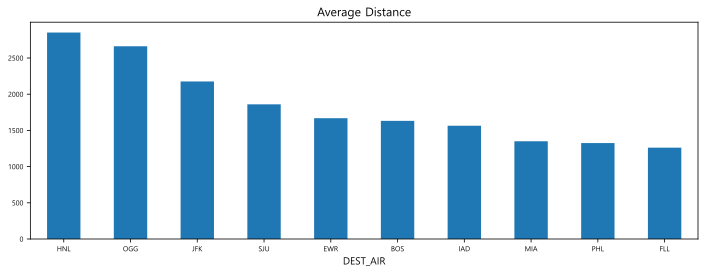

In [22]:
# 다변량 도면 살펴보기
fig, ax = plt.subplots(figsize=(12, 4))
(flights
.groupby('DEST_AIR')['DIST']
.agg(['mean', 'count'])
.query("count >= 100")
# nlargest() 메서드 활용해 평균 항로가 가장 긴 10개 공항 찾기 -> 위치 인자는 숫자, 키워드 인자(columns)는 해당 열 지정
# keep 파라미터 활용하여 동일 값이 있을 경우 어떤 내용을 남길 수 있는지 지정 가능
.nlargest(10, columns='mean', keep='all')
# y 축에는 평균거리만 넣기 + fontsize, legend 등 파라미터 활용 가능
.plot.bar(y='mean', ax=ax, rot=0, fontsize=7, legend=False, title='Average Distance')
)

(0.9877395073248438,
              DIST  AIR_TIME
 DIST      1.00000   0.98774
 AIR_TIME  0.98774   1.00000)

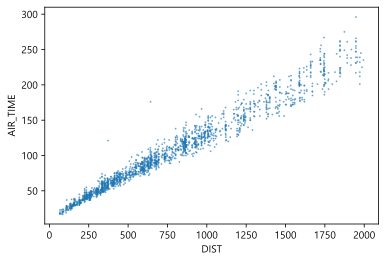

In [23]:
# scatter() 메서드 활용해 산포도 분석 가능
(flights
.sample(2000, random_state=42)
.reset_index(drop=True)
[['DIST', 'AIR_TIME']]
.query("DIST <= 2000")
.dropna()
# s 파라미터는 각 점의 크기, alpha 파라미터는 투명도
.plot.scatter(x='DIST', y='AIR_TIME', alpha=0.5, s=1)
)
# corr() 메서드를 통해 상관계수 파악 -> 행렬 형태로도 확인 가능
flights['DIST'].corr(flights['AIR_TIME']), flights[['DIST', 'AIR_TIME']].corr()

In [24]:
short = (flights
.sample(2000, random_state=42)
[['DIST', 'AIR_TIME']]
.query("DIST <= 2000")
.dropna()
.reset_index(drop=True)
# assign() 메서드 및 pd.cut() 함수 활용하여 'DIST' 열을 이산변수로 구분
.assign(BIN=lambda df: pd.cut(df['DIST'], bins=range(0, 2001, 250), 
labels=['0-250', '251-500', '501-750', '751-1000', '1001-1250', '1251-1500', '1501-1750', '1751-2000']))
)
short

,DIST,AIR_TIME,BIN
0,1303,162.0,1251-1500
1,374,54.0,251-500
2,651,92.0,501-750
3,802,125.0,751-1000
4,224,43.0,0-250
...,...,...,...
1823,806,119.0,751-1000
1824,1390,175.0,1251-1500
1825,954,127.0,751-1000
1826,448,74.0,251-500


<AxesSubplot:>

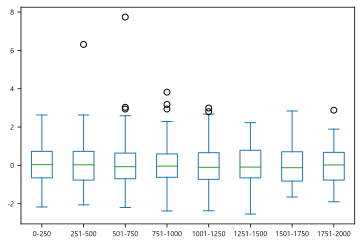

In [25]:
scores = (short
# 'BIN'을 그룹화 열, 'AIR_TIME'을 집계 열로 가진 후
.groupby('BIN')['AIR_TIME']
# transform() 메서드 이용하여 원래 인덱스 유지하면서 표준정규분포 z값 삽입
.transform(lambda x: (x - x.mean()) / x.std())
.round(2)
)
(short
.assign(SCORE=scores)
# pivot() 메서드를 활용할 시 인덱스는 원래 인덱스를 유지해야하므로 columns 파라미터와 values 파라미터만 활용
.pivot(columns='BIN', values='SCORE')
.plot.box(fontsize=7)
)

In [26]:
# z값의 절대값이 3 이상인 outlier를 파악하기 위해 불리언 배열 활용
mask = (short
.assign(SCORE=scores)
# pipe() 메서드를 활용해 불리언 배열로 전환
.pipe(lambda df: df['SCORE'].abs().gt(3))
)
# 기존 구한 mask를 바탕으로 outlier에 해당하는 데이터만 추출
outliers = (short
.assign(SCORE=scores)
# loc 속성 이용하여 mask 삽입
.loc[mask]
# assign() 메서드 및 range() 이용하여 번호 지정
.assign(PLOT_NUM=lambda df: range(1, len(df) + 1, 1))
)
outliers

,DIST,AIR_TIME,BIN,SCORE,PLOT_NUM
145,643,176.0,501-750,7.74,1
963,931,158.0,751-1000,3.18,2
1140,967,166.0,751-1000,3.82,3
1440,731,123.0,501-750,3.03,4
1689,373,121.0,251-500,6.31,5


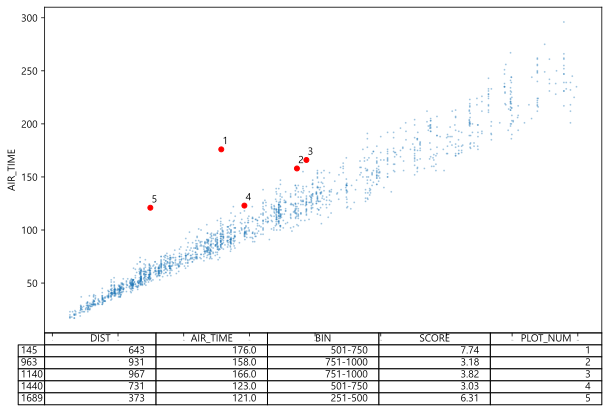

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
(short
.assign(SCORE=scores)
# table 파라미터 이용하여 도표에 대한 데이터테이블 삽입 가능
.plot.scatter(x='DIST', y='AIR_TIME', s=1, alpha=0.3, ax=ax, table=outliers)
)
(outliers
# s 파라미터를 크게 하고 color='red' 인자 전달하여 outlier 데이터들은 눈에 띄게 설정
.plot.scatter(x='DIST', y='AIR_TIME', s=25, alpha=1, color='red', ax=ax)
)
# itertuples() 메서드 활용 -> for 문을 이용하여 DataFrame의 행을 순환하면서 처리
# 'index=False' 인자를 전달하여 인덱스는 순환의 대상에서 제외
for air_time, air_dist, number in outliers[['AIR_TIME', 'DIST', 'PLOT_NUM']].itertuples(index=False):
    # 각 air_time, air_dist는 숫자 -> text()메서드를 이용(x좌표, y좌표, 써지는 내용 순)
    ax.text(air_dist + 5, air_time + 5, str(number))
# set_xlabel('') 이요해 x축의 라벨 제거
ax.set_xlabel('')
# tick_params() 메서드 활용, x축의 labelsize 파라미터를 0으로 지정
ax.tick_params(axis='x', labelsize=0)

In [28]:
# 누적 영역 차트를 통해 새로운 경향 발견 가능 -> 시장점유율 등
meetup = pd.read_csv(p1 / 'meetup_groups.csv', parse_dates=['join_date'], index_col='join_date')
meetup = meetup.sort_index()
meetup.tail()

,group,city,state,country
join_date,,,,
2017-10-12 16:26:41,houston data science,Houston,TX,us
2017-10-12 19:27:34,houston data science,Houston,TX,us
2017-10-12 19:44:02,houston data science,Houston,TX,us
2017-10-13 00:51:55,houston data visualization,Houston,TX,us
2017-10-13 03:22:34,houston data visualization,League City,TX,us


Text(0.86, 0.78, 'Machine Learning')

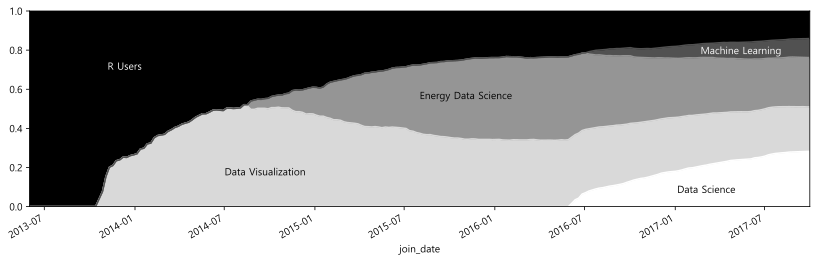

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(14, 4))
(meetup
# 주별로 각 그룹에 참가한 사람 수 확인
.groupby([pd.Grouper(freq='W'), 'group'])
.size()
.unstack(fill_value=0)
# cumsum() 메서드를 통해 총 회원 수를 파악(누적 합계 살펴보기)
.cumsum()
# pipe() 메서드 활용하여 전체 백분율을 사용 -> 각 행의 총 합이 항상 1이 되도록
.pipe(lambda df: df.div(df.sum(axis=1), axis=0))
# plot 속성의 area() 메서드 활용하여 누적 도면 그리기
# xlim, ylim 파라미터 활용하여 범위 제한 가능 -> xlim의 경우 datetime 문자열로 축 제한 설정 가능(ax.set_xlim()으로는 불가능)
.plot.area(cmap='Greys', ax=ax, xlim=('2013-06', '2017-10'), ylim=(0, 1), legend=False)
)
# annotate() 메서드에서 언패킹을 진행할 딕셔너리 생성
kwargs = {'xycoords':'axes fraction', 'fontsize':10}
# annotate() 활용해 주석 삽입, **kwargs 통해 딕셔너리 언패킹 진행
ax.annotate(xy=(0.1, 0.7), text='R Users', color='white', **kwargs)
ax.annotate(xy=(0.25, 0.16), text='Data Visualization', color='black', **kwargs)
ax.annotate(xy=(0.5, 0.55), text='Energy Data Science', color='black', **kwargs)
ax.annotate(xy=(0.83, 0.07), text='Data Science', color='black', **kwargs)
ax.annotate(xy=(0.86, 0.78), text='Machine Learning', color='white', **kwargs)

In [30]:
# seaborn의 경우 pandas DataFrame과 함께 작동 -> 정돈된 데이터 필요
employee = pd.read_csv(p1 / 'employee.csv', parse_dates=['HIRE_DATE', 'JOB_DATE'])
employee.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22


<AxesSubplot:xlabel='count', ylabel='DEPARTMENT'>

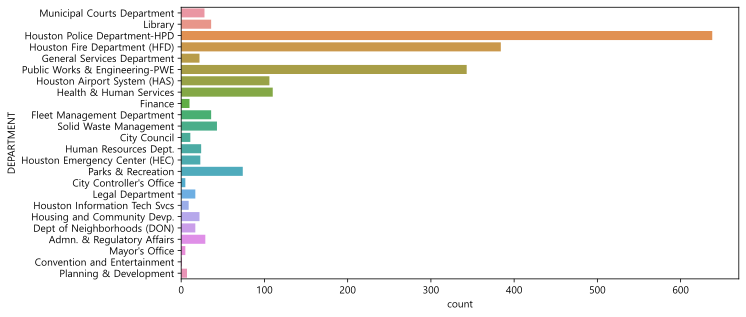

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))
# seaborn의 countplot() 함수 사용하여 부서 개수 막대그래프로 표현
sns.countplot(data=employee, y='DEPARTMENT', ax=ax)

<AxesSubplot:>

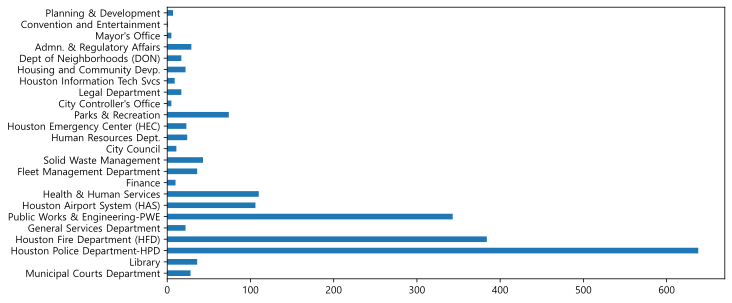

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))
# pandas로 재현하려면 그 전에 데이터를 집계해야 -> matplotlib은 집계된 데이터와 매칭
(employee['DEPARTMENT']
.value_counts(sort=False)
.plot.barh(ax=ax)
)

<AxesSubplot:xlabel='BASE_SALARY', ylabel='RACE'>

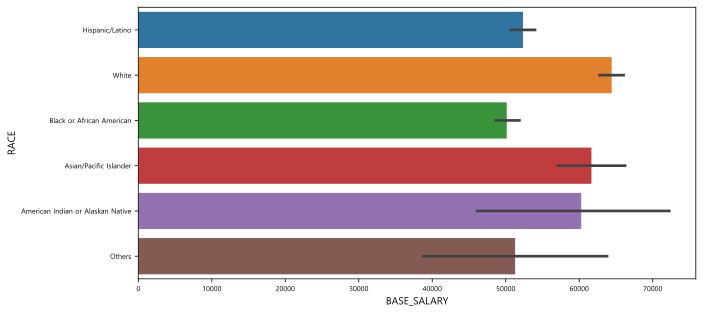

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.tick_params(axis='both', labelsize=7)
# 각 인종별 평균급여 확인을 위해 y축에 'RACE', x축에 'BASE_SALARY' 설정
sns.barplot(data=employee, y='RACE', x='BASE_SALARY', ax=ax)

<AxesSubplot:ylabel='RACE'>

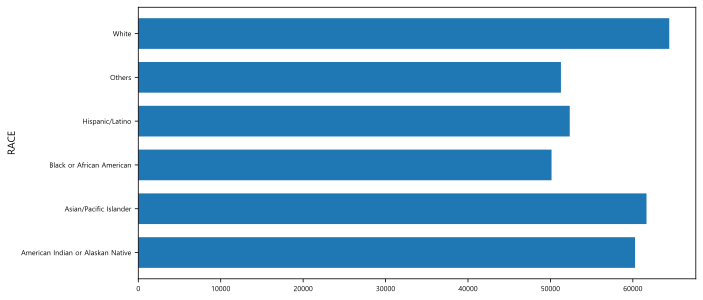

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.tick_params(axis='both', labelsize=7)
# pandas로 복제하려면 먼저 그룹화를 진행하여 집계
(employee
.groupby('RACE')['BASE_SALARY']
.mean()
# width 파라미터 이용하여 막대의 두께 설정 가능
.plot.barh(ax=ax, width=0.7)
)

<AxesSubplot:xlabel='RACE', ylabel='BASE_SALARY'>

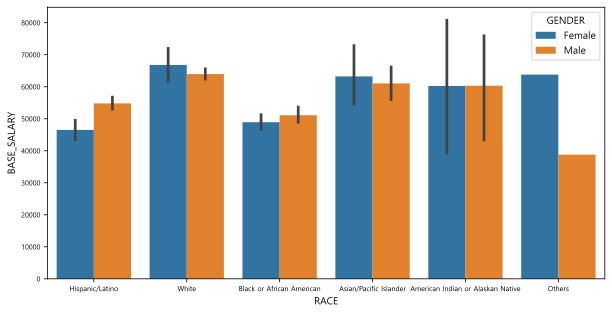

In [35]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.tick_params(axis='both', labelsize=7)
# seaborn의 경우 hue 파라미터를 사용해 데이터 내에서 그룹을 구분 가능
sns.barplot(data=employee, x='RACE', y='BASE_SALARY', hue='GENDER', ax=ax)

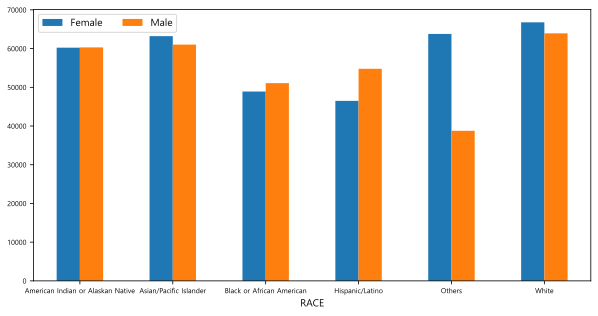

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.tick_params(axis='both', labelsize=7)
# pandas로는 그룹화를 진행한 다음 hue 파라미터에 해당하는 변수를 열 이름으로 unstack 진행해야
(employee
.groupby(['RACE', 'GENDER'])['BASE_SALARY']
.mean()
.unstack()
.plot.bar(ax=ax, rot=0)
)
# pyplot의 legend() 메서드 이용하여 범례의 위치 조정 가능 -> loc, ncol 등 파라미터 활용
ax.legend(loc=2, ncol=2)

<AxesSubplot:xlabel='RACE', ylabel='BASE_SALARY'>

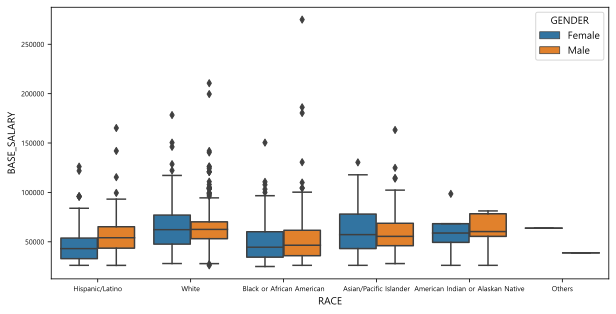

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.tick_params(axis='both', labelsize=7)
# seaborn의 boxplot() 함수 활용하여 상자그림 생성 가능
sns.boxplot(data=employee, x='RACE', y='BASE_SALARY', hue='GENDER', ax=ax)

In [38]:
# seaborn의 특정 함수는 fig 수준에서 작동 -> catplot, lmplot, jointplot, clustermap 등
# fig 수준에서 작동할 경우 seaborn grid로 생성 -> grid 함수를 사용해 도면에 더 많은 차원을 추가

In [42]:
# 경력연수를 새로운 열로 추가하기 위해 함수 생성
def years_exp(df):
    # Timestamp 형식의 경우 .sum() 메서드 활용 불가능 -> 직접 마이너스로 진행해야
    days_hired = pd.to_datetime('2016-12-01') - df['HIRE_DATE']
    # days_hired의 경우 Timestamp 형식 -> dt 속성을 이용해 days를 추출해낸 뒤 365.25로 나눠야
    return days_hired.dt.days / 365.25

In [43]:
emp = employee.assign(YEARS_EXPERIENCE=years_exp)
emp.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE,YEARS_EXPERIENCE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13,10.472279
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18,16.369610
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03,1.826146
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25,34.811773
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22,27.452430


<AxesSubplot:xlabel='YEARS_EXPERIENCE', ylabel='BASE_SALARY'>

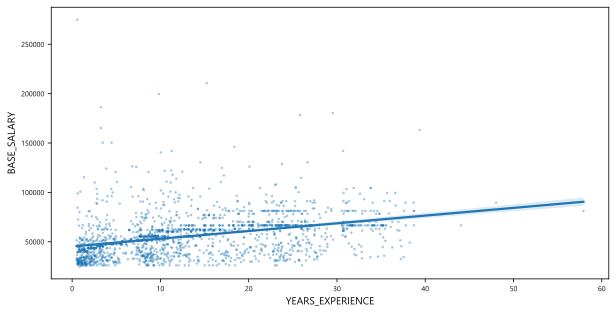

In [47]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.tick_params(axis='both', labelsize=7)
# seaborn의 regplot() 함수를 사용해 회귀선이 포함된 산포도 그리기 -> scatter_kws, line_kws 파라미터 활용 및 딕셔너리 전달
sns.regplot(data=emp, x='YEARS_EXPERIENCE', y='BASE_SALARY', scatter_kws={'s':3, 'alpha':0.3}, ax=ax)

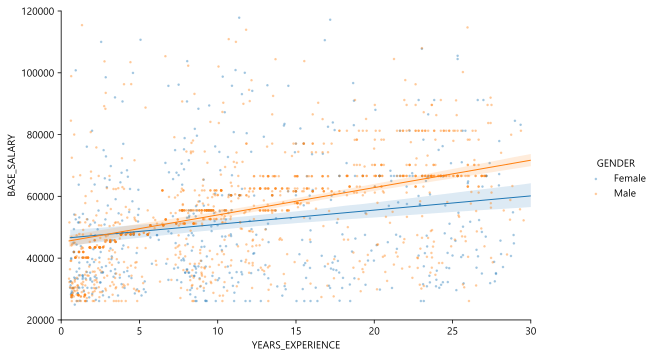

In [53]:
# lmplot() 함수는 fig 단계에서 작동, hue 파라미터럴 전달하면서 다중 회귀선 가능
# scatter_kws 및 line_kws 파라미터에 전달할 내용은 pyplot의 plot 내 파라미터와 동일
grid = sns.lmplot(data=emp, x='YEARS_EXPERIENCE', y='BASE_SALARY', hue='GENDER', scatter_kws={'s':3, 'alpha':0.3}, line_kws={'linewidth':1})
# grid에 fig.set_size_inches() 전달하여 크기 조정
grid.fig.set_size_inches(10, 5)
# set() 메서드를 통해 xlim, ylim 파라미터 등 전달 가능
grid.set(xlim=(0, 30), ylim=(20000, 120000))

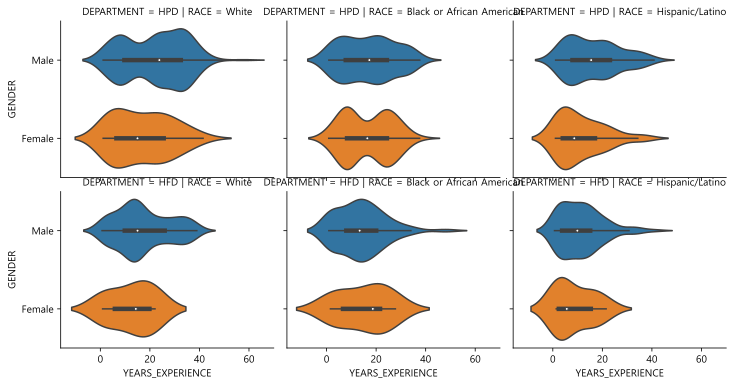

In [66]:
# 'DEPARTMENT' 열의 상위 2개 부서 지정
deps = emp['DEPARTMENT'].value_counts().index[:2]
# 'RACE' 열의 상위 3개 인종 지정
races = emp['RACE'].value_counts().index[:3]
# isin() 메서드 활용해 불리언 배열로 전환
is_dep = emp['DEPARTMENT'].isin(deps)
is_race = emp['RACE'].isin(races)
# 불리언 배열을 활용하여 필터링 진행
emp2 = (emp[is_dep & is_race]
# str 속성의 extract() 메서드 활용해 정규표현식으로 부서 약칭 추출
.assign(DEPARTMENT=lambda df: df['DEPARTMENT'].str.extract(r'(HFD|HPD)'))
)
# seaborn의 catplot() 함수에 kind='violoin' 인자 전달하여 도표 추출 -> col, row 파라미터 등 활용 가능
grid = sns.catplot(data=emp2, x='YEARS_EXPERIENCE', y='GENDER', col='RACE', row='DEPARTMENT', kind='violin')
grid.fig.set_size_inches(10, 5)

<AxesSubplot:xlabel='YEARS_EXPERIENCE', ylabel='GENDER'>

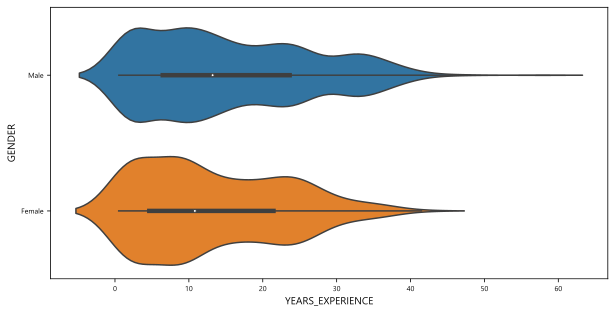

In [59]:
# groupby 객체의 filter() 메서드 이용하여 50명 이상의 사람이 존재하는 부서만 추출
common_depts = (emp
.groupby('DEPARTMENT')
.filter(lambda group: len(group) > 50)
)
fig, ax = plt.subplots(figsize=(10, 5))
ax.tick_params(axis='both', labelsize=7)
# seaborn의 violinplot() 함수 이용하여 도표 추출 가능
sns.violinplot(data=common_depts, x='YEARS_EXPERIENCE', y='GENDER', ax=ax)

In [67]:
# 데이터를 세부적으로 파악하여 심슨의 역설 회피
dia = pd.read_csv(p1 / 'diamonds.csv')
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [68]:
# 'cut', 'color', 'clarity' 열을 정렬된 범주 변수로 변경 -> pd.Categorical() 함수 이용
cut_cats = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_cats = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_cats = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
dia2 = (dia
.assign(cut=pd.Categorical(dia['cut'], categories=cut_cats, ordered=True))
.assign(color=pd.Categorical(dia['color'], categories=color_cats, ordered=True))
.assign(clarity=pd.Categorical(dia['clarity'], categories=clarity_cats, ordered=True))
)
dia2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


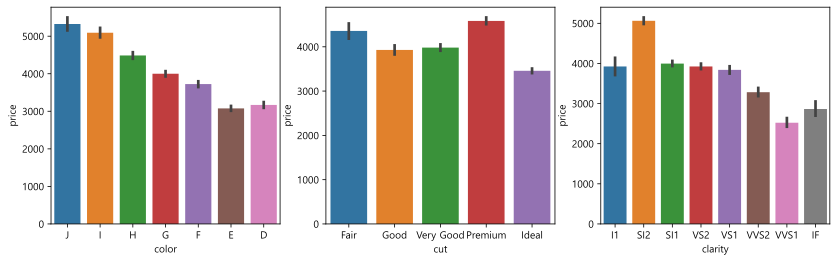

In [70]:
# 'color', 'cut', 'clarity' 열에 대한 도식화 진행
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
ax1, ax2, ax3 = axs
# for 순환문과 zip() 함수를 사용하여 한꺼번에 진행
for x_axis, ax in zip(['color', 'cut', 'clarity'], axs):
    sns.barplot(data=dia2, x=x_axis, y='price', ax=ax)

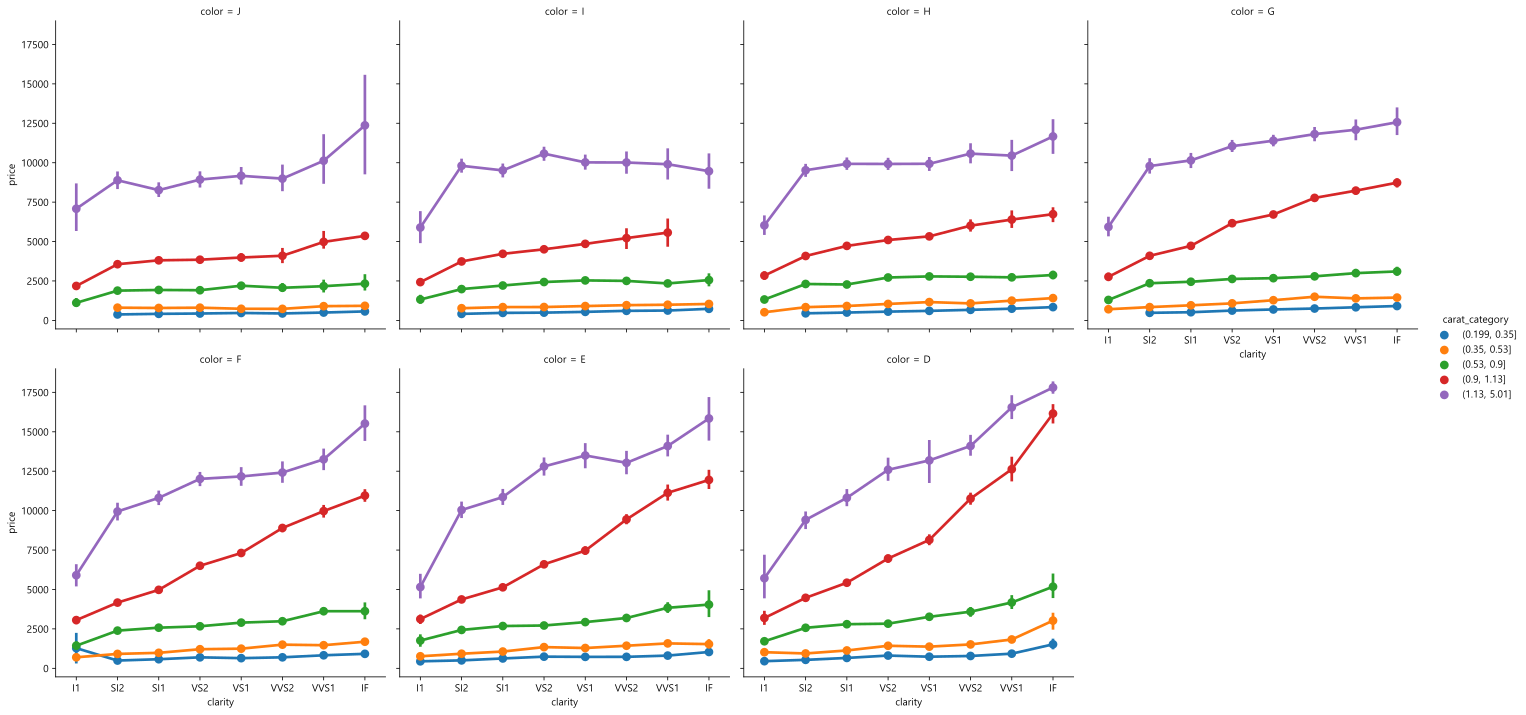

In [72]:
# 크기에 따라 분할한 도표를 생성 -> 고품질 다이아몬드가 비싼지 확인
dia3 = dia2.assign(carat_category=pd.qcut(dia2['carat'], 5))
grid = sns.catplot(data=dia3, x='clarity', y='price', hue='carat_category', col='color', col_wrap=4, kind='point')